Explanation of the PCA with code examples.
Sources: 

https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.12-Example-Principal-Components-Analysis/

https://stats.stackexchange.com/questions/141864/how-can-top-principal-components-retain-the-predictive-power-on-a-dependent-vari

In [53]:
import numpy as np
from sklearn import decomposition
import matplotlib.pyplot as plt

In [54]:
# simple example of SVD
#A = np.array(np.arange(10)).reshape(5,2)
A = np.array([[4,4],[-3,3]])
print(A)
# A = U x S x V.T
# V is an orthogonal matrix of the EV of A^t x A
V = np.linalg.eig(A.T.dot(A))
# S is a diagonal matrix of the EW of A^T x A respectively A x A^T since the EW are the same 
S = np.linalg.eig(A.T.dot(A))
S = np.diag(np.sqrt(S[0]))
#print(S)
# U is the EV of A x A^T
U = np.linalg.eig(A.dot(A.T))
#print(U)
# test
T = U[1].dot(S).dot(V[1].T)
print(T)

[[ 4  4]
 [-3  3]]
[[ 4.  4.]
 [-3.  3.]]


[[ 1.   0.5]
 [ 2.   1.5]
 [ 3.   1. ]
 [ 4.   1.5]
 [ 5.   2.5]
 [ 6.   2. ]
 [ 7.   1.5]
 [ 8.   3. ]
 [ 9.   4. ]
 [10.   3. ]]


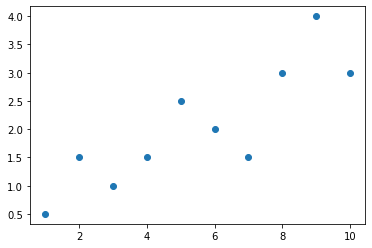

In [129]:
#A = np.random.random(20).reshape(10,2)
#print(A)
A = np.array([[1,0.5],[2,1.5],[3,1],[4,1.5],[5,2.5],[6,2],[7,1.5],[8,3],[9,4],[10,3]])
print(A)
#plt.scatter(A[:,0],A[:,1])
plt.plot(A[:,0],A[:,1],'o')

PCA is based on finding the eigenvectors of the sample covariance matrix of a dataset.
The definition of covariance for a random variable X is:

$$
Cov(X)=E[(X−μX)(X−μX)T] \\
$$

whereas the sample covariance matrix is:
$$
C = \sum_{i=0}^n (x_i - μ_x) (x_i - μ_x)^T \\
$$

(in reality there's also a positive constant, which is usually either 1/n or 1/(n-1), but we know that this changes neither the eigenvector directions, nor the order of the eigenvalues, and so we are not interested in this constant and can leave it out).

Now, nothing stops you from not centering the data at all, and computing the Covariance matrix like that; PCA will still work. However, if you center the data, the implication is that $ μ_x = 0 $, and thus the Covariance matrix is simply: $ C = \sum_{i=0}^n x_i x^T_i $
If your data-points are stored as the columns of a data-set matrix X, then you get the covariance matrix at the simple cost of a matrix multiplication $ C = X X^T $

[[82.5   24.75 ]
 [24.75  10.225]]
[[ 0.95526127 -0.29576327]
 [ 0.29576327  0.95526127]]
[90.16297267  2.56202733]


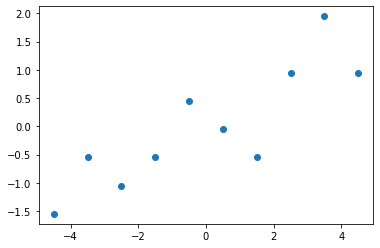

In [130]:
# center A
A -= np.mean(A, axis=0)
plt.plot(A[:,0], A[:,1], 'o')
print(A.T.dot(A))
# calc ev of A^t x A
# These are the vectors maximizing our function. 
# Each column vector is associated with an eigenvalue. 
# The vector associated with the larger eigenvalue tells us the direction associated with the larger variance in our data.
ew, ev = np.linalg.eig(A.T.dot(A))
print(ev)
print(ew)

We can now plot the Eigenvectors of the Covariance Matrix. We can see that the blue vector direction corresponds to the oblique shape of our data. The idea is that if you project the data points on the line corresponding to the blue vector direction you will end up with the largest variance. This vector has the direction that maximizes variance of projected data. The second eigenvector is orthogonal to the first.

[0.         0.         0.95526127 0.29576327]
[ 0.          0.         -0.29576327  0.95526127]


(-2.55, 2.95)

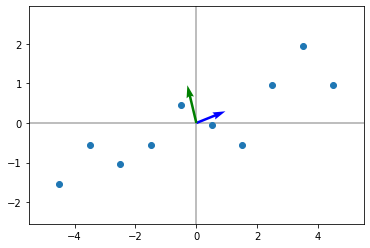

In [131]:
# plot EVs
plt.figure()
plt.axvline(x=0, color='#A9A9A9', zorder=0)
plt.axhline(y=0, color='#A9A9A9', zorder=0)
cols = ['blue','green']

for i in range(len(ev)):
    x = np.concatenate([[0,0], ev[:,i]])
    print(x)
    plt.quiver([x[0]],
               [x[1]],
               [x[2]],
               [x[3]],
               angles='xy', scale_units='xy', scale=1, color=cols[i],
               alpha=1)
#
plt.plot(A[:,0], A[:,1], 'o')
#
plt.xlim(np.min(A[:,0])-1, np.max(A[:,0])+1)
plt.ylim(np.min(A[:,1])-1, np.max(A[:,1])+1)

(-1.9690386042814862, 1.82758801793302)

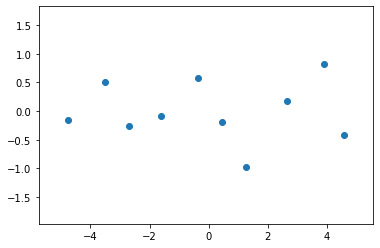

In [132]:
# scale along first pca dimension
# c = D^t * x
X_new = ev.T.dot(A.T)
plt.plot(X_new[0,:],X_new[1,:],'o')
plt.xlim(np.min(X_new[0,:])-1, np.max(X_new[0,:])+1)
plt.ylim(np.min(X_new[1,:])-1, np.max(X_new[1,:])+1)

[[-4.5  -1.55]
 [-3.5  -0.55]
 [-2.5  -1.05]
 [-1.5  -0.55]
 [-0.5   0.45]
 [ 0.5  -0.05]
 [ 1.5  -0.55]
 [ 2.5   0.95]
 [ 3.5   1.95]
 [ 4.5   0.95]]
[[-0.95526127 -0.29576327]
 [ 0.29576327 -0.95526127]]
[10.01810807  0.2846697 ]
[[ 4.75710877  0.14972024]
 [ 3.50608423 -0.50977775]
 [ 2.6987046   0.26361615]
 [ 1.5955617   0.08174879]
 [ 0.34453716 -0.57774921]
 [-0.46284247  0.1956447 ]
 [-1.2702221   0.9690386 ]
 [-2.66912827 -0.16809002]
 [-3.92015281 -0.82758802]
 [-4.57965081  0.42343652]]
[[-4.5  -1.55]
 [-3.5  -0.55]
 [-2.5  -1.05]
 [-1.5  -0.55]
 [-0.5   0.45]
 [ 0.5  -0.05]
 [ 1.5  -0.55]
 [ 2.5   0.95]
 [ 3.5   1.95]
 [ 4.5   0.95]]
[[-4.5  -1.55]
 [-3.5  -0.55]
 [-2.5  -1.05]
 [-1.5  -0.55]
 [-0.5   0.45]
 [ 0.5  -0.05]
 [ 1.5  -0.55]
 [ 2.5   0.95]
 [ 3.5   1.95]
 [ 4.5   0.95]]


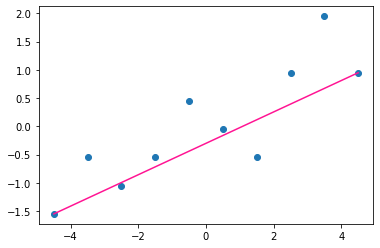

In [133]:
# compare to scikit PCA
print(A)
pca = decomposition.PCA(2)
pca.fit(A)
print(pca.components_)
print(pca.explained_variance_)
# transform data
B = pca.transform(A)
print(B)
#plt.plot(A[:,0], A[:,1], B[:,0], B[:,1], 'o')
#
B_inv = pca.inverse_transform(B)
print(B_inv)
print(A)
plt.plot(A[:,0], A[:,1], 'o')
plt.plot([B_inv[0,0], B_inv[-1,0]], [B_inv[0,1], B_inv[-1,1]], 'deeppink')